In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [3]:
data.drop(['Unnamed: 0'],axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


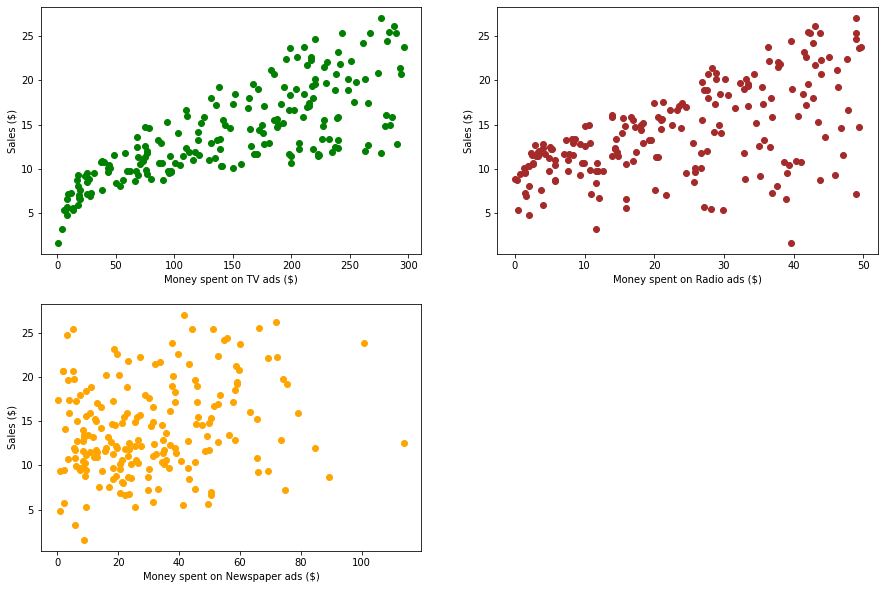

In [4]:
import matplotlib.pyplot as plt
myplt=plt.figure(figsize=(15,10))
ax1 = myplt.add_subplot(2,2,1)
ax1=plt.scatter(
 data['TV'],
 data['sales'],
 c='green' #change the color and see output 
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
#plt.show()

#myplt.figure(figsize=(8,4))
ax2 = myplt.add_subplot(2,2,2)
ax2=plt.scatter(
 data['radio'],
 data['sales'],
 c='brown' #change the color and see output 
)
plt.xlabel("Money spent on Radio ads ($)")
plt.ylabel("Sales ($)")
#plt.show()


#myplt.figure(figsize=(8,4))
ax3 = myplt.add_subplot(2,2,3)
ax3=plt.scatter(
 data['newspaper'],
 data['sales'],
 c='orange' #change the color and see output 
)
plt.xlabel("Money spent on Newspaper ads ($)")
plt.ylabel("Sales ($)")
plt.show()

Applying Linear Regression on tv adds vs sales
1. splitting data into test and train dataset using sklearn library  
2. finding best fit line using sklearn inbuilt linar regression

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
x=data['TV'].values.reshape(-1,1)
y=data['sales'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

Get equation of best fit line 
Finding slope(m) and intercept(c)

In [8]:
print("slope(m) is",reg.coef_[0][0])
print("intercept(c) is",reg.intercept_[0])
print("The Linear Model of sales is  y= {:.3} + {:.2}x".format(reg.intercept_[0],reg.coef_[0][0]))

slope(m) is 0.042107777273991585
intercept(c) is 7.516083100730508
The Linear Model of sales is  y= 7.52 + 0.042x


Plotting tv adds VS sales linear regression line

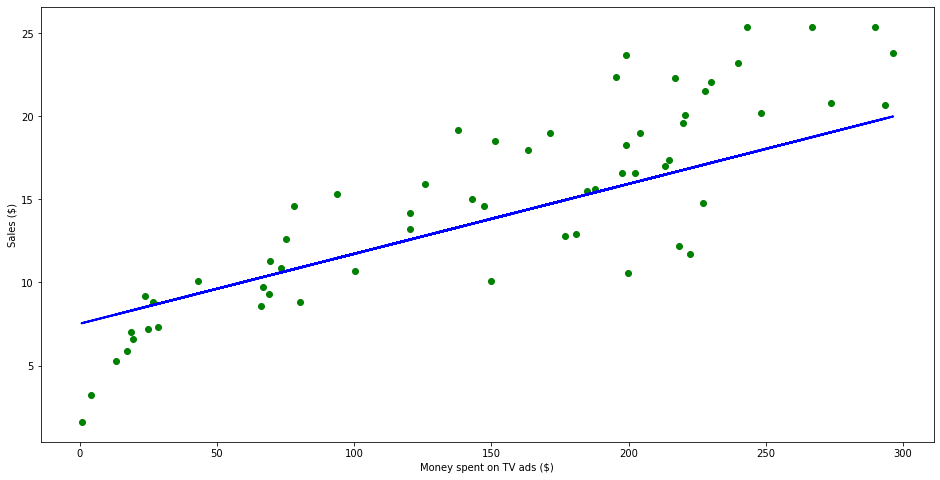

In [9]:
predictions = reg.predict(x_test)
plt.figure(figsize=(16, 8))
plt.scatter(
 x_test,
 y_test,
 c='green' #change the color and see output
)
plt.plot(
 x_test,
 predictions,
 c='blue',
 linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

Calculating RMSE value for TV vs Sales

In [10]:
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error = ",rmse)

Root Mean Squared Error =  3.4959661738018672
